# Зависимость дисперсии среднего от числа примеров в эксперименте

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Функция генерации экспериментов
def gen_expiremnts(mean=0, 
                   scale=10,
                   n_samples=10,
                   n_experiements=500):
    
    return np.random.normal(loc=mean,
                            scale=scale,
                            size=(n_experiements, n_samples))

In [26]:
data[:2, :]

array([[ -4.38447871,   0.49651154,   0.35908024, -19.44370006,
         11.88984339,  -0.66126825,  -5.12691534, -12.04453961,
        -12.60927406,   2.58976499],
       [ 11.60428786,  -1.87769831, -23.03582787,   7.89540497,
         12.994679  , -17.92428765,   1.68140947,   6.98585424,
          5.3557321 ,  -2.96968957]])

In [3]:
data = gen_expiremnts(n_samples=10)
data_100 = gen_expiremnts(n_samples=100)

In [4]:
means = np.mean(data, axis=1)
means_100 = np.mean(data_100, axis=1)

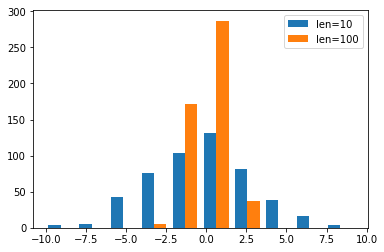

In [5]:
plt.hist([means, means_100])
plt.legend(['len=10', 'len=100']);

In [6]:
std = []
for n_samples in range(10, 110, 10):
    data = gen_expiremnts(n_samples=n_samples)
    means = np.mean(data, axis=1)
    std.append(np.std(means))

Text(0, 0.5, 'std')

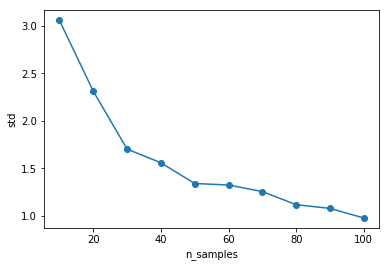

In [7]:
plt.plot(range(10, 110, 10), std, '-o')
plt.xlabel('n_samples')
plt.ylabel('std')

In [8]:
# TODO: оценить зависимость дисперсии 
#       от числа примеров в эксперименте
#       (построить график)

## Доверительный интервал для среднего

In [23]:
from scipy import stats as st
# TODO: построить доверительный интервал для n_samles=10
#       при уровне значимости 0.95 (95%)

n_samples = 10
data = gen_expiremnts(n_samples=n_samples)
means = np.mean(data, axis=1)
std = np.std(means)
    
confidence = 0.975
z = st.norm.ppf(confidence)
margin = z * std

In [24]:
margin

6.453163404254806

In [18]:
data = gen_expiremnts(n_samples=n_samples)
means = np.mean(data, axis=1)

In [25]:
np.sum(np.abs(means) > margin) / means.shape[0]

0.054

In [ ]:
# TODO: провести эксперимент и показать корректность полученного интервала